In [2]:
import matplotlib.pyplot as plt
import numpy as np
from traffic_template import *

plt.style.use('default')

### Flowrate over time

Text(42.597222222222214, 0.5, 'Flow rate')

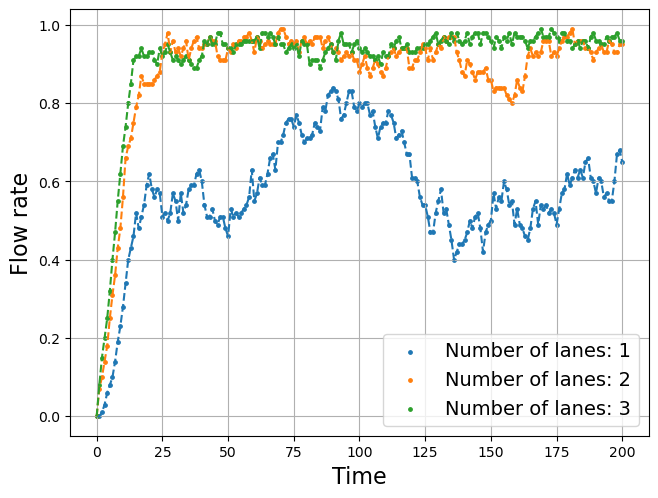

In [4]:
# Simulation parameters
numCars = 10
roadLength = 100
vmax = 10
sigma = vmax/10
lanes_values = [1, 2, 3]
numsteps = 200
p = 0.2
right_overtaking = True

# Run simulation
#plt.figure(figsize=(6, 4))
for lanes in lanes_values:
    cars = Cars(numCars=numCars, roadLength=roadLength, lanes=lanes, vmax=vmax, sigma=sigma)
    simulation = Simulation(cars)
    simulation.run(propagator=MyPropagator(p=p, right_overtaking=right_overtaking), numsteps=numsteps)

    data = simulation.obs

    plt.scatter(data.time, data.flowrate, label=f"Number of lanes: {lanes}", s=6)
    plt.plot(data.time, data.flowrate, "--")


plt.legend(fontsize=14, loc="lower right")
plt.tight_layout()
plt.grid()
plt.xlabel("Time", fontsize=16)
plt.ylabel("Flow rate", fontsize=16)


### Fundamental diagrams

In [19]:
# Set simulation parameters
numCars_values = np.arange(1, 101, 4)
roadLength = 100
car_density_values = numCars_values/roadLength
vmax = 10
sigma = vmax/10
lanes_values = [1, 2, 3]
p = 0.2
numsteps = 200

# Run simulation
results = []
for i, lanes in enumerate(lanes_values):
    print(f"{i+1}/{len(lanes_values)}")
    flowrate_values = []
    for numCars in numCars_values:
        cars = Cars(numCars=numCars, roadLength=roadLength, lanes=lanes, vmax=vmax, sigma=sigma)
        simulation = Simulation(cars)
        simulation.run(propagator=MyPropagator(p=p), numsteps=numsteps)

        data = simulation.obs

        avg_flowrate = np.mean(data.flowrate[-100:])

        flowrate_values.append(avg_flowrate)
    results.append(flowrate_values)
time = data.time

1/3
2/3
3/3


Text(42.597222222222214, 0.5, 'Average flow rate')

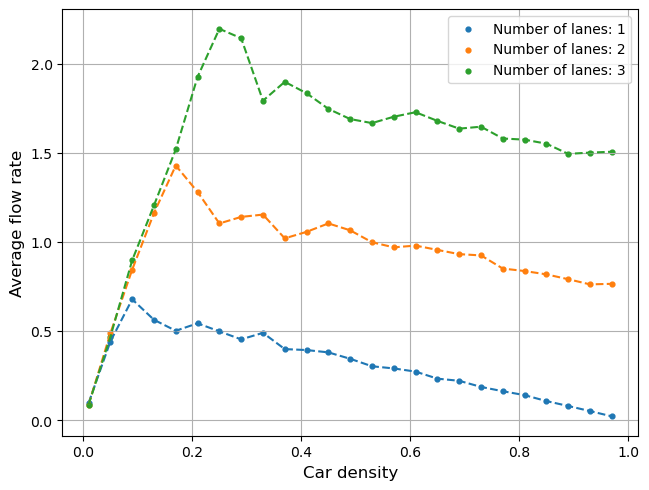

In [20]:
# Plot results
for fr, lanes in zip(results, lanes_values):
    plt.scatter(car_density_values, fr, label=f"Number of lanes: {lanes}", s=12)
    plt.plot(car_density_values, fr, "--")

plt.legend(fontsize=10)
plt.tight_layout()
plt.grid()
plt.xlabel("Car density", fontsize=12)
plt.ylabel("Average flow rate", fontsize=12)

### Standard error of the flowrate plotted against car density

In [3]:
# Set simulation parameters
numCars_values = np.arange(1, 101, 4)
roadLength = 100
car_density_values = numCars_values/roadLength
vmax = 10
sigma = vmax/10
lanes_values = [1, 2, 3]
p = 0.2
numsteps = 200
n = 100

# Run simulation
results = []
for i, lanes in enumerate(lanes_values):
    print(f"{i+1}/{len(lanes_values)}")
    std_error_values = []
    for numCars in numCars_values:
        avg_flowrate_values = []
        for j in range(n):
            cars = Cars(numCars=numCars, roadLength=roadLength, lanes=lanes, vmax=vmax, sigma=sigma)
            simulation = Simulation(cars)
            simulation.run(propagator=MyPropagator(p=p), numsteps=numsteps)

            data = simulation.obs
            avg_flowrate = np.mean(data.flowrate[-100:])
            avg_flowrate_values.append(avg_flowrate) 
        std_error = np.std(avg_flowrate_values)/np.sqrt(n)
        std_error_values.append(std_error)
    results.append(std_error_values)


1/3
2/3
3/3


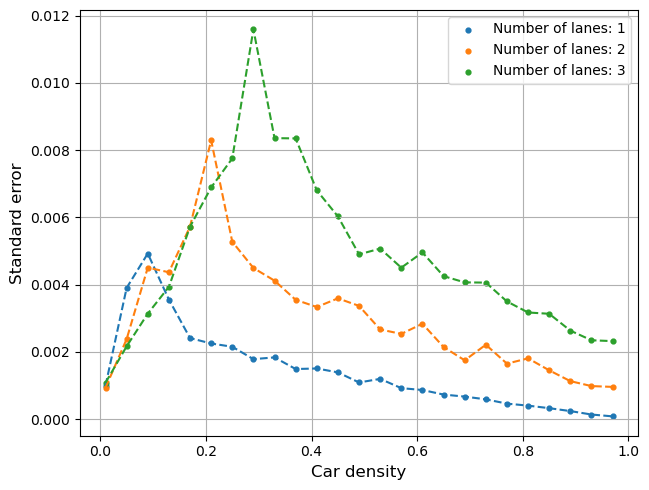

In [14]:
# Plot results
for res, lanes in zip(results, lanes_values):
    plt.scatter(car_density_values, res, label=f"Number of lanes: {lanes}", s=12)
    plt.plot(car_density_values, res, "--")
plt.grid()
plt.legend(fontsize=10)
plt.tight_layout()
plt.xlabel("Car density", fontsize=12)
plt.ylabel("Standard error", fontsize=12)

#np.save("standard_errors", results)

### Standard error plotted against number of iterations

In [17]:
# Simulation parameters
numCars = 40
roadLength = 100
vmax = 10
sigma = vmax/10
lanes_values = [1, 2, 3]
numsteps = 200
p = 0.2
n_values = np.arange(5, 205, 5)
right_overtaking = True

# Run simulation
results = []
for i, lanes in enumerate(lanes_values):
    print(f"{i+1}/{len(lanes_values)}")
    avg_flowrate_values = []
    standard_error_values = []
    for n in n_values:
        cars = Cars(numCars=numCars, roadLength=roadLength, lanes=lanes, vmax=vmax, sigma=sigma)
        simulation = Simulation(cars)
        simulation.run(propagator=MyPropagator(p=p, right_overtaking=right_overtaking), numsteps=numsteps)

        data = simulation.obs
        avg_flowrate = data.flowrate[-100]
        avg_flowrate_values.append(avg_flowrate)

        standard_error = np.std(avg_flowrate_values)/np.sqrt(n)
        standard_error_values.append(standard_error)
    results.append(standard_error_values)    

1/3
2/3
3/3


Text(24.847222222222214, 0.5, 'Standard error')

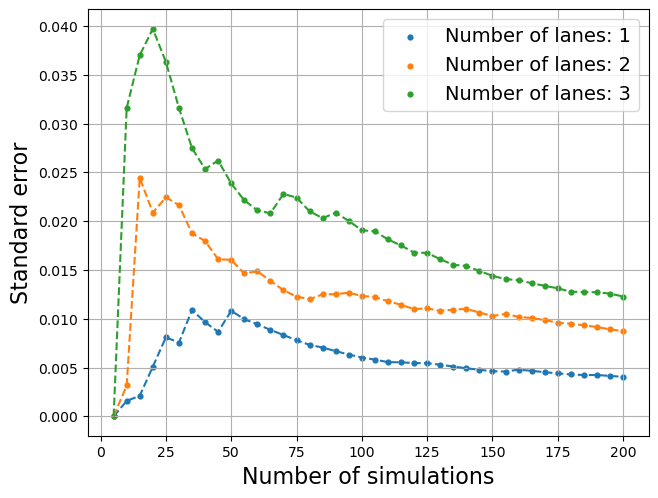

In [18]:
# Plot results
for res, lanes in zip(results, lanes_values):
    plt.scatter(n_values, res, label=f"Number of lanes: {lanes}", s=12)
    plt.plot(n_values, res, "--")
plt.grid()
plt.legend(fontsize=14)
plt.tight_layout()
plt.xlabel("Number of simulations", fontsize=16)
plt.ylabel("Standard error", fontsize=16)

### Finite size effects

In [8]:
# Set simulation parameters
roadLength_values = np.arange(10, 100, 20)
#car_density_values = numCars_values/roadLength
vmax = 10
sigma = vmax/10
lanes = 2
p = 0.2
numsteps = 200
n = 10

# Run simulation
results = []

for roadLength in roadLength_values:
    print(roadLength)
    if roadLength < 25:
        numCars_values = np.arange(1, roadLength+1)
    elif roadLength > 25:
        numCars_values = np.linspace(1, roadLength, 25)
        numCars_values = numCars_values.astype(int)

    flowrate_values = []
    for numCars in numCars_values:
        flowrates = []
        for j in range(n):
            cars = Cars(numCars=numCars, roadLength=roadLength, lanes=lanes, vmax=vmax, sigma=sigma)
            simulation = Simulation(cars)
            simulation.run(propagator=MyPropagator(p=p), numsteps=numsteps)

            data = simulation.obs

            avg_flowrate = np.mean(data.flowrate[-100:])

            flowrates.append(avg_flowrate)
        flowrate_values.append(np.mean(flowrates))
    results.append((numCars_values/roadLength, flowrate_values))
time = data.time

10
30
50
70
90


Text(33.722222222222214, 0.5, 'Average flow rate')

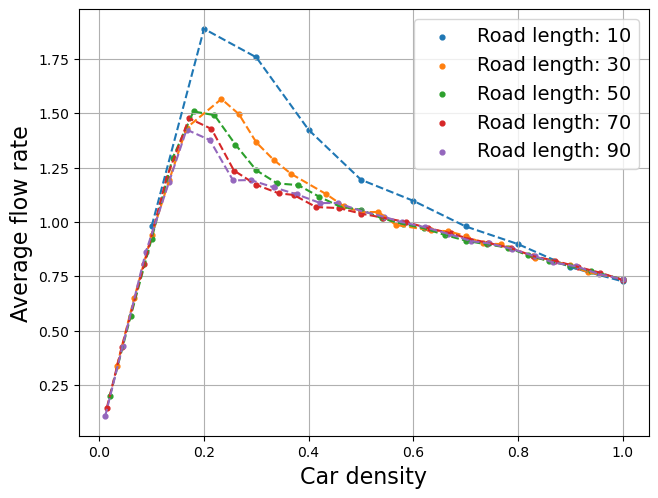

In [9]:
# Plot results
for fr, road_length in zip(results, roadLength_values):
    plt.scatter(fr[0], fr[1], label=f"Road length: {road_length}", s=12)
    plt.plot(fr[0], fr[1], "--")

plt.legend(fontsize=14)
plt.tight_layout()
plt.grid()
plt.xlabel("Car density", fontsize=16)
plt.ylabel("Average flow rate", fontsize=16)

#np.save("1_lane_fd", fr)